<a href="https://colab.research.google.com/github/lucianoigit/Data_scientist/blob/main/SVM_Clasificador_Irisipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import warnings
from sklearn import svm, datasets


warnings.filterwarnings("ignore")

In [13]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from matplotlib.colors import ListedColormap
import numpy as np

def plot_decision_regions(X, y, classifier, titulo, resolution=0.02): 

#definir un generador de marcadores y un mapa de colores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

#representar la superficie de decisión
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    #representar muestras de clase
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        plt.title(titulo)
    plt.show()               

In [15]:
# Importo el dataset
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target


In [16]:


# Creo una instancia de SVM y entreno
C = 1.0  # Regulo los parametros
models = (svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C))
models = (clf.fit(X, y) for clf in models)



In [17]:
# Titulo de los graficos
titles = ("SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel")


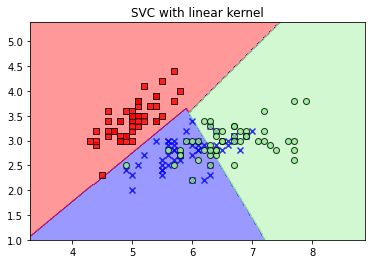

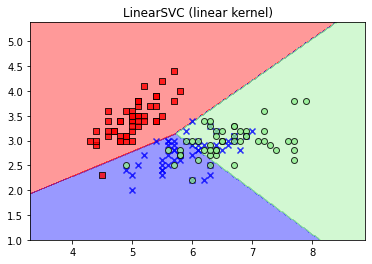

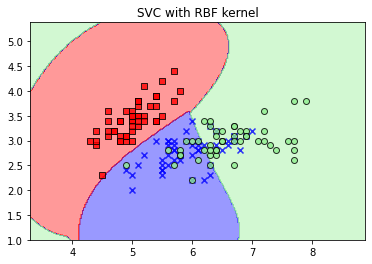

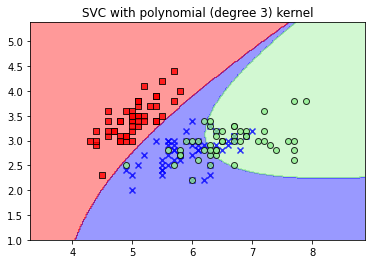

In [18]:
for model, title in zip(models, titles):
   
    plot_decision_regions(X, y, model, title)
    